In [319]:
%matplotlib notebook

In [320]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for Chart and plot
import math # for floor function 


# File to Load 
city_data_to_load = "raw_data/city_data.csv"
ride_data_to_load = "raw_data/ride_data.csv"

# Read City and Ride Data File and store into Pandas Data Frames
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# # Combine the data into a single dataset
city_ride_data_complete = pd.merge(city_data, ride_data, how="inner", on=["city", "city"])
# city_ride_data_complete

In [321]:
# Calculating $ Displaying Average Fare, date, Total Number of Rides, Total Number of Drivers based on City Type
rides_analysis = city_ride_data_complete
rides_analysis['rides'] = 0 
rides_analysis['drivers'] = 0
rides_analysis = rides_analysis.groupby(['city']).agg({'fare':'mean'
                                   ,'date':'min'
                                   , 'rides':'size'
                                   ,'driver_count':'max'               
                                   ,'type':'min'})
rides_analysis = rides_analysis.rename(columns = {'fare' :'Average Fare'
                                 ,'rides' : 'Total Number of Rides'
                                 , 'driver_count' : 'Total Number of Drivers'
                                 , 'type' : 'City Type'
                                })
#rides_analysis

In [322]:
# filter on Urban
Urban = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Urban")]
# len(Urban)
#Urban

In [323]:
# filter on Suburban
Suburban = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Suburban")]
len(Suburban)
# Suburban

36

In [324]:
# Filter on Rural
Rural = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Rural")]
len(Rural)
# Rural

18

In [325]:
# Find the max and min of the 'Average Fare' to plot on y axis
rides_fare_average_min = rides_analysis["Average Fare"].min()
rides_fare_average_min

20.093157894736848

In [326]:
# Find the max of the 'Average Fare' to plot on y axis
rides_fare_average_max = rides_analysis["Average Fare"].max()
rides_fare_average_max

43.278333333333336

In [327]:
# Find the max and min of the 'Total Number of Rides' to plot on x axis
Total_Number_of_Rides_min = rides_analysis["Total Number of Rides"].min()
Total_Number_of_Rides_min

3

In [328]:
# Find the max and min of the 'Total Number of Rides' to plot on x axis
Total_Number_of_Rides_max = rides_analysis["Total Number of Rides"].max()
Total_Number_of_Rides_max

39

In [329]:
# Create a list from 0 to 40 with each step being 0.1 higher than the last
x_axis = np.arange(0, Total_Number_of_Rides_max+6, 5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40], dtype=int64)

In [330]:
# Create a list from 0 to 40 with each step being 0.1 higher than the last
y_axis = np.arange(math.floor( rides_fare_average_min ) - 5, math.floor(rides_fare_average_max) + 6, 5)
y_axis

array([15, 20, 25, 30, 35, 40, 45])

In [331]:
# # test
# Urban["Total Number of Rides"] = Urban["Total Number of Rides"] * Urban["Total Number of Drivers"]

In [332]:
# # Test
# # Bubble Plot
# Urban = plt.scatter(Urban["Average Fare"],Urban["Total Number of Rides"], marker="o", facecolors="darkorange", edgecolors="black",
#             s = x_axis, alpha=0.75, label="Urban")
# Suburban = plt.scatter(Suburban["Average Fare"],Suburban["Total Number of Rides"], marker="o", facecolors="lightblue", edgecolors="black",
#             s = x_axis, alpha=0.75, label="Suburban")
# Rural = plt.scatter(Rural["Average Fare"],Rural["Total Number of Rides"], marker="o", facecolors="yellow", edgecolors="black",
#             s = x_axis, alpha=0.75, label="Rural")
# plt.show()

<IPython.core.display.Javascript object>


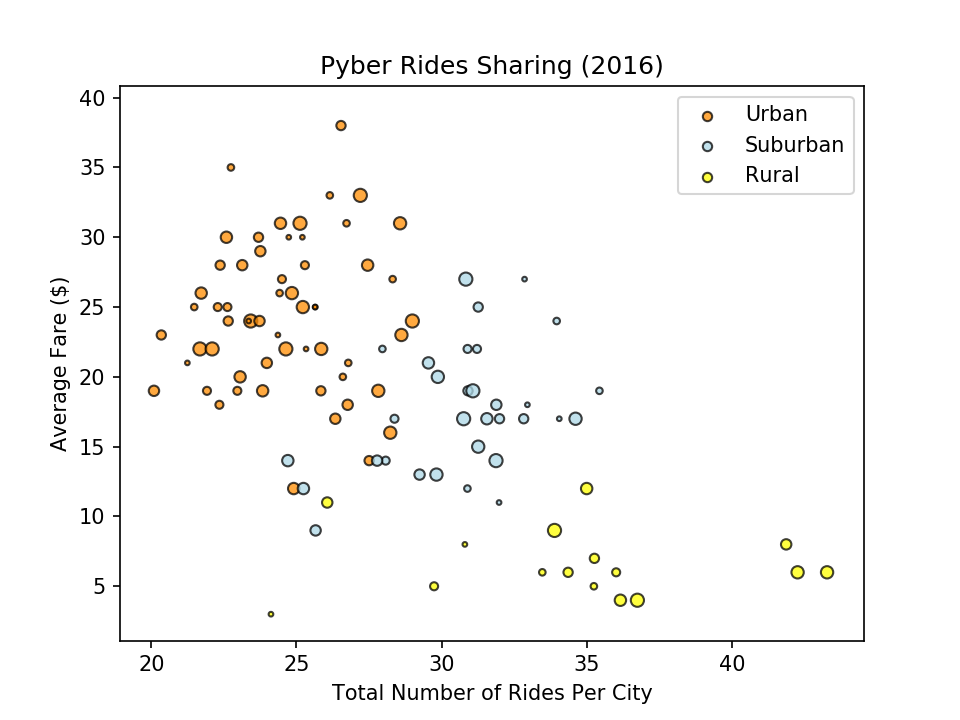

In [333]:
# Bubble Plot
Urban = plt.scatter(Urban["Average Fare"],Urban["Total Number of Rides"], marker="o", facecolors="darkorange", edgecolors="black",
            s = x_axis, alpha=0.75, label="Urban")
Suburban = plt.scatter(Suburban["Average Fare"],Suburban["Total Number of Rides"], marker="o", facecolors="lightblue", edgecolors="black",
            s = x_axis, alpha=0.75, label="Suburban")
Rural = plt.scatter(Rural["Average Fare"],Rural["Total Number of Rides"], marker="o", facecolors="yellow", edgecolors="black",
            s = x_axis, alpha=0.75, label="Rural")
plt.show()

In [334]:
# Add labels to the x and y axes
plt.title("Pyber Rides Sharing (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

Text(70.5833,0.5,'Average Fare ($)')

In [335]:
# Create a legend for the chart
plt.legend(handles=[Urban,Suburban,Rural], loc="best")